In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Q1
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no Null Values

<AxesSubplot:>

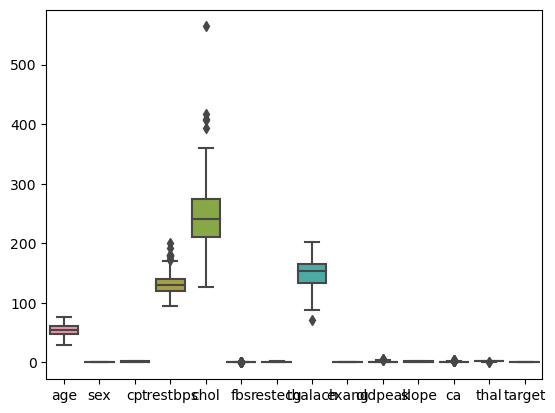

In [4]:
sns.boxplot(data = df)

In [5]:
# dividing data intp independent and dependent Variable
X = df.drop('target',axis = 1)
y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train

NameError: name 'X_train' is not defined

In [10]:
#q2

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 41)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [11]:
# Q3

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=10)

In [12]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [13]:
y_pred = model.predict(X_test)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [14]:
# Q4

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[37 10]
 [ 4 40]]
0.8461538461538461
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        47
           1       0.80      0.91      0.85        44

    accuracy                           0.85        91
   macro avg       0.85      0.85      0.85        91
weighted avg       0.85      0.85      0.85        91



In [15]:
# Q5
model.feature_importances_

array([0.09264655, 0.03584639, 0.16539192, 0.07111111, 0.07601413,
       0.00870561, 0.01968432, 0.11062887, 0.04495172, 0.10029817,
       0.03608323, 0.1442457 , 0.0943923 ])

In [16]:
# Q6
param = {
    'n_estimators' : [50,70,100,130],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [5,10,15],
    'min_samples_split' :[2,3,4],
    'min_samples_leaf' :[1,2]
} 

In [17]:
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(RandomForestClassifier(),cv = 5,param_grid = param)

In [18]:
model.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\Lenovo\anaconda3\lib\site-packages\joblib\parallel.py", line 1085, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\Lenovo\anaconda3\lib\site-pa

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 15], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 70, 100, 130]})

In [19]:
# Q7
model.best_params_
classifier = RandomForestClassifier(criterion = 'entropy',max_depth = 5,min_samples_leaf = 1,min_samples_split = 2,n_estimators = 50)

In [20]:
classifier.fit(X_train,y_train)
y_hyper_pred = classifier.predict(X_test)
y_hyper_pred

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1], dtype=int64)

In [21]:
#Q8

print(f'Defualt Model Accuracy : {accuracy_score(y_test,y_pred)}')
print(f'HyperTuned Model Accuracy : {accuracy_score(y_test,y_hyper_pred)}')

Defualt Model Accuracy : 0.8461538461538461
HyperTuned Model Accuracy : 0.8351648351648352


In [22]:
importance = classifier.feature_importances_

<AxesSubplot:>

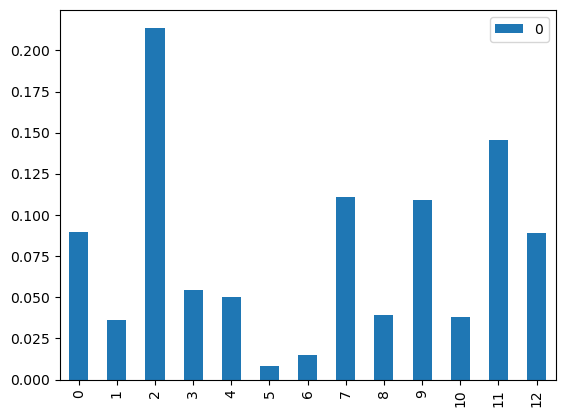

In [23]:
importance_df = pd.DataFrame(importance)
importance_df.plot.bar()

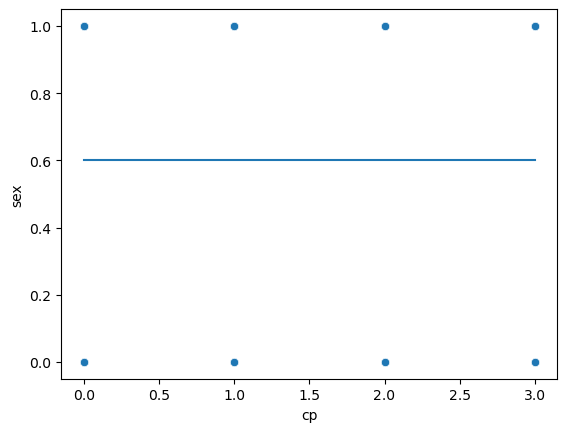

In [24]:
# Q8
sns.scatterplot(data = df,x = df.iloc[:,2],y = df.iloc[:,1])
plt.plot([0.0,3.0],[0.6,0.6])
plt.show()